In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [79]:
df = pd.read_csv('flag.csv')

In [80]:
df.head().T

,0,1,2,3,4
country,Afghanistan,Albania,Algeria,American-Samoa,Andorra
landmass,5,3,4,6,3
zone,1,1,1,3,1
area,648,29,2388,0,0
population,16,3,20,0,0
language,10,6,8,1,6
religion,2,6,2,1,0
bars,0,0,2,0,3
stripes,3,0,0,0,0
colours,5,3,3,5,3


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
country           194 non-null object
landmass          194 non-null int64
zone              194 non-null int64
area              194 non-null int64
population        194 non-null int64
language          194 non-null int64
religion          194 non-null int64
bars              194 non-null int64
stripes           194 non-null int64
colours           194 non-null int64
red               194 non-null int64
green             194 non-null int64
blue              194 non-null int64
gold              194 non-null int64
white             194 non-null int64
black             194 non-null int64
orange            194 non-null int64
dominantcolour    194 non-null object
circles           194 non-null int64
crosses           194 non-null int64
saltires          194 non-null int64
quarters          194 non-null int64
sunstars          194 non-null int64
crescent          194 non-null int64
train

Пропущенных значений нет

In [82]:
# удалим из датасета признак страны, т.к. он не понадобится для 
# обучения модели и сохраним на всякий случай.
countries = df['country']
df.drop('country', axis=1, inplace=True)

In [83]:
# Целевая переменная
trg = 'religion'

In [84]:
# посмотрим на распределение целевой переменной
df[trg].value_counts(normalize=True)

1    0.309278
0    0.206186
2    0.185567
5    0.139175
6    0.077320
3    0.041237
7    0.020619
4    0.020619
Name: religion, dtype: float64

Как видно, датасет не сбалансирован относительно целевой переменной. Два класса представляют всего лишь по 2% от общего количества образцов.

In [107]:
cat_cols = []
for col in df.columns:
    if col not in ['area', 'population', trg] and df[col].nunique()>2:
        cat_cols.append(col)

In [108]:
num_cols = list(set(df.columns) - set(cat_cols) - {trg})

In [109]:
# категориальные переменные
cat_cols

['landmass',
 'zone',
 'language',
 'bars',
 'stripes',
 'colours',
 'dominantcolour',
 'circles',
 'crosses',
 'quarters',
 'sunstars',
 'topleftcolour',
 'botrightcolor']

In [110]:
# числовые переменные
num_cols

['population',
 'animate',
 'text',
 'crescent',
 'red',
 'white',
 'gold',
 'black',
 'icon',
 'area',
 'traingle',
 'saltires',
 'green',
 'orange',
 'blue']

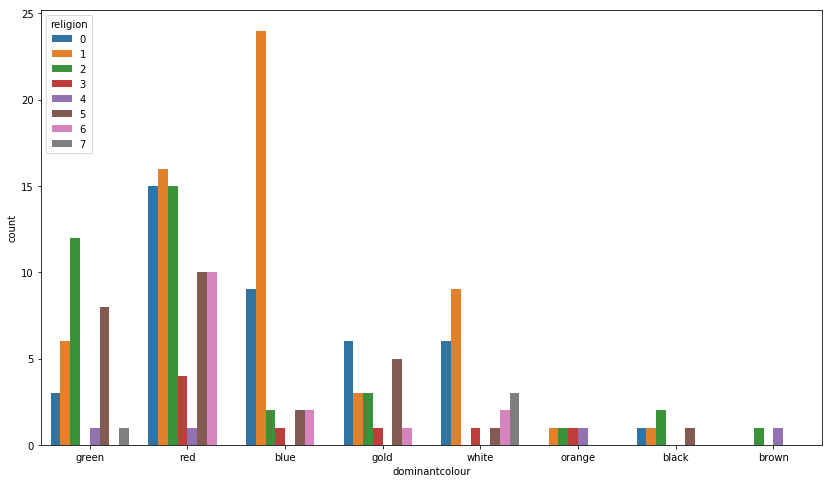

In [70]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'dominantcolour', hue=trg, data=df)

Есть цвета, которые гораздо чаще встречаются у определенных религий, например синий, белый и зеленый. При этом некоторые цвета одинаково распределены по реллигиям, например оранжевый и коричневый.

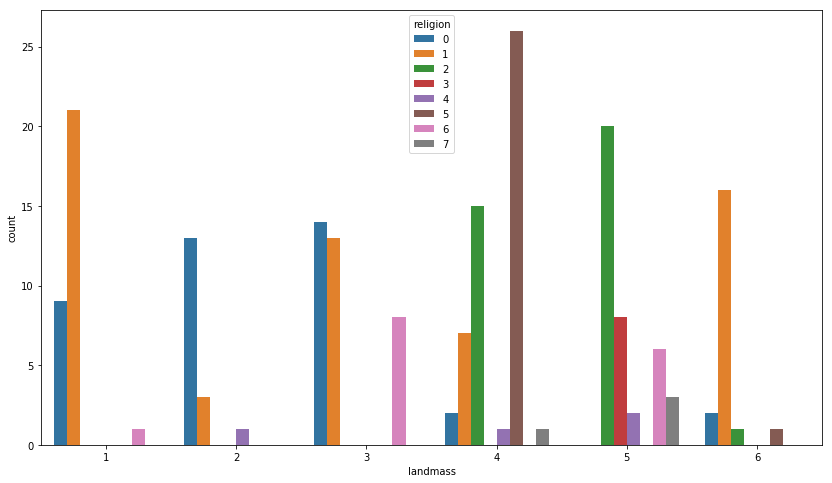

In [102]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'landmass', hue=trg, data=df)

На разных материках - разные доминирующие цвета.

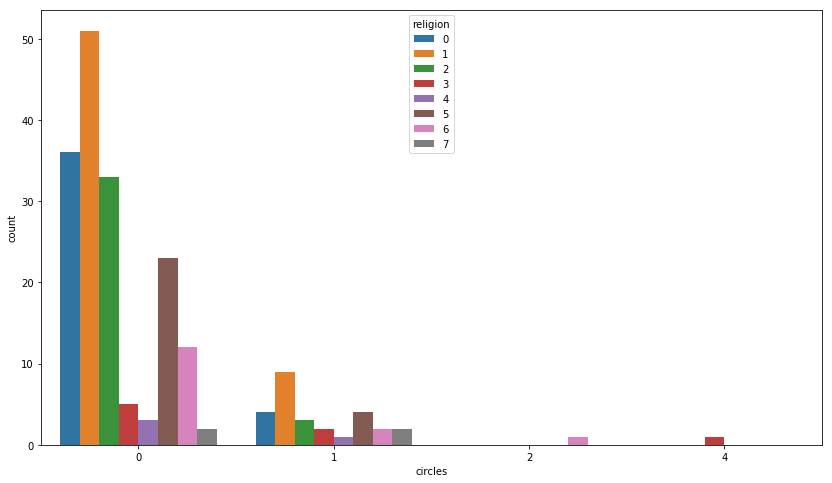

In [112]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'circles', hue=trg, data=df)

Наличие кругов не сильно коррелирует с религией.

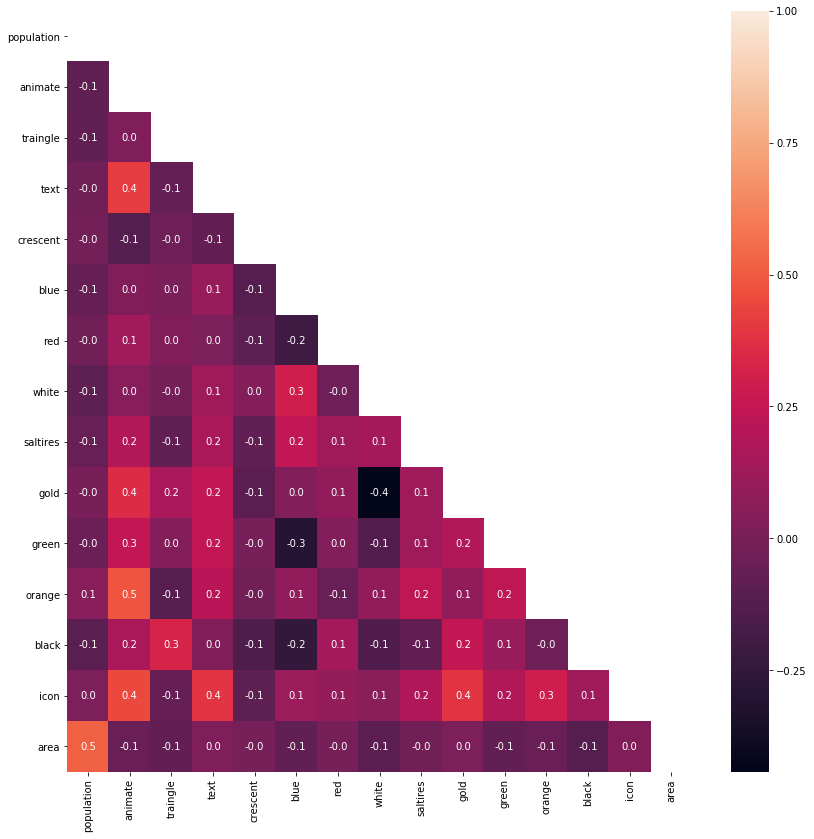

In [106]:
# Посмотрим на корреляцию числовых признаков
corr = df[num_cols].corr()

plt.figure(figsize = (14,14))

mask = np.triu(np.ones((len(corr), len(corr))), k=0)

ax = sns.heatmap(corr, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".1f"
           )

Признаки не имеют сильной линейной корреляции. Наибольшая корреляция у площади и популяции, а также у наличия оранжевого цвета и наличия какого-либо изображения на флаге.

In [118]:
df.columns

Index(['landmass', 'zone', 'area', 'population', 'language', 'religion',
       'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white',
       'black', 'orange', 'dominantcolour', 'circles', 'crosses', 'saltires',
       'quarters', 'sunstars', 'crescent', 'traingle', 'icon', 'animate',
       'text', 'topleftcolour', 'botrightcolor'],
      dtype='object')

In [119]:
cat_cols

['landmass',
 'zone',
 'language',
 'bars',
 'stripes',
 'colours',
 'dominantcolour',
 'circles',
 'crosses',
 'quarters',
 'sunstars',
 'topleftcolour',
 'botrightcolor']

In [121]:
# преобразуем категориальные переменные в dummies переменные
X = pd.get_dummies(df.drop(trg, axis=1), columns=cat_cols)
y = df[trg]

In [122]:
X.head()

,area,population,red,green,blue,gold,white,black,orange,saltires,...,topleftcolour_red,topleftcolour_white,botrightcolor_black,botrightcolor_blue,botrightcolor_brown,botrightcolor_gold,botrightcolor_green,botrightcolor_orange,botrightcolor_red,botrightcolor_white
0,648,16,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,29,3,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2388,20,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [123]:
from sklearn.model_selection import train_test_split

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from xgboost import XGBClassifier

In [223]:
# чтобы избежать утечки информации, масштабирование и PCA будет
# осуществляться внутри перекрестной проверки.
np.random.seed(1)

location = '.\cachedir'
memory = Memory(location, verbose=10)

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('pca', PCA()),
    ('xgb',  XGBClassifier())], 
    memory
)

grid = {
        'pca__n_components': np.arange(20, len(X_train.columns)//2),
        'xgb':  [XGBClassifier()],
        'xgb__gamma': [1, 1.5, 2, 5],
        'xgb__max_depth': [3, 4, 5]
        }


grid_search = GridSearchCV(pipeline, param_grid=grid, cv=3, verbose=10, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

In [251]:
pca = grid_search.best_estimator_.named_steps['pca']

In [259]:
pca.n_components

20

In [260]:
index = []
for comp in pca.components_:
    index.extend(comp.argsort()[-1:][::-1])
index

[9, 3, 19, 40, 15, 71, 0, 32, 50, 68, 71, 102, 38, 36, 36, 50, 14, 80, 101, 37]

Посмотрим самую важную составляющую компонент:

In [262]:
X_train.columns[index]

Index(['saltires', 'green', 'landmass_5', 'stripes_0', 'landmass_1',
       'circles_4', 'area', 'language_8', 'stripes_13', 'circles_0',
       'circles_4', 'botrightcolor_gold', 'bars_3', 'bars_1', 'bars_1',
       'stripes_13', 'text', 'sunstars_2', 'botrightcolor_brown', 'bars_2'],
      dtype='object')

In [225]:
top_features = X_train.columns[grid_search.best_estimator_.named_steps['pca'].support_]
top_features_df = pd.DataFrame({'top_features':top_features})
top_features_df

In [226]:
grid_search.best_score_

0.6064516129032258

In [227]:
grid_search.best_params_

{'pca__n_components': 20,
 'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=2, learning_rate=0.1, max_delta_step=0,
        max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1),
 'xgb__gamma': 2,
 'xgb__max_depth': 4}

In [228]:
results = grid_search.cv_results_

In [229]:
score_keys = [key for key in results.keys() if 'split' in key and 'test' in key]
score_keys

['split0_test_score', 'split1_test_score', 'split2_test_score']

In [230]:
params_dct = {'cv_result_'+str(i): result for i, result in enumerate(
    np.array([results[score] for score in score_keys]))}

In [231]:
params_dct['model_params'] = results['params']

In [232]:
results_df = pd.DataFrame(params_dct)

In [233]:
results_df['mean_result'] = results_df.mean(axis=1)
results_df['std_result'] = results_df.std(axis=1)

In [264]:
results_df.sort_values('mean_result', ascending=False).head(5)

,cv_result_0,cv_result_1,cv_result_2,model_params,mean_result,std_result
7,0.622642,0.673077,0.52,"{'pca__n_components': 20, 'xgb': XGBClassifier...",0.605239,0.063693
68,0.641509,0.634615,0.52,"{'pca__n_components': 25, 'xgb': XGBClassifier...",0.598708,0.055726
51,0.641509,0.634615,0.52,"{'pca__n_components': 24, 'xgb': XGBClassifier...",0.598708,0.055726
62,0.641509,0.653846,0.50,"{'pca__n_components': 25, 'xgb': XGBClassifier...",0.598452,0.069798
43,0.622642,0.634615,0.52,"{'pca__n_components': 23, 'xgb': XGBClassifier...",0.592419,0.051441


Как видно получается очень сильная вариация по фолдам. Вероятно из-за того, что целевые классы сильно несбалансированы.

In [235]:
model = grid_search.best_estimator_

In [236]:
y_pred = model.predict(X_test)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [237]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [238]:
print(f'Доля правильных предсказаний: {accuracy_score(y_test, y_pred):.5f}')

Доля правильных предсказаний: 0.69231


In [239]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.64      0.75      0.69        12
           2       0.75      0.86      0.80         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.80      0.80      0.80         5
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        39
   macro avg       0.43      0.45      0.44        39
weighted avg       0.63      0.69      0.66        39



/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [240]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7, 1, 0, 0, 0, 0, 0, 0],
       [1, 9, 0, 0, 0, 1, 1, 0],
       [0, 1, 6, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 4, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

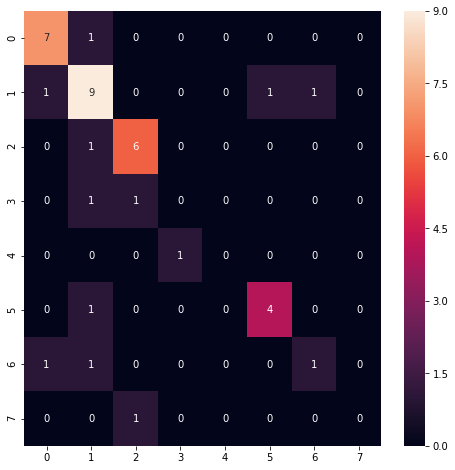

In [241]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True)

Как видно, некоторые редкие классы не удалось правильно классифицировать.

In [270]:
import xgboost
import matplotlib

In [ ]:
Посмотрим на важность признаков.

In [265]:
xgb = XGBClassifier()

In [266]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

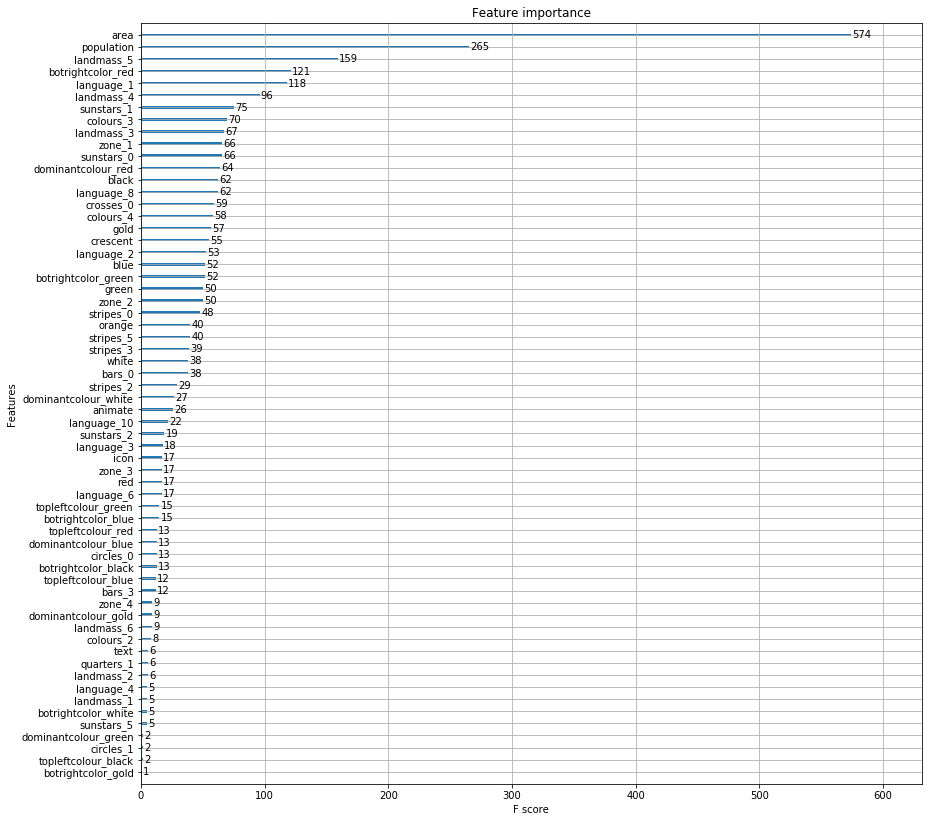

In [272]:
matplotlib.rcParams['figure.figsize'] = (14, 14)
xgboost.plot_importance(booster=xgb)

## Oversampling/Undersampling

In [273]:
df[trg].value_counts(normalize=True)

1    0.309278
0    0.206186
2    0.185567
5    0.139175
6    0.077320
3    0.041237
7    0.020619
4    0.020619
Name: religion, dtype: float64

In [275]:
df[trg].value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

Так как данных очень мало и есть очень редкие классы, Undersampling проводить нецелесообразно. Попробуем стратегию Oversampling, что в данном случае довольно странно, т.к. мы будем "выдумывать" новые флаги.

In [279]:
from imblearn.over_sampling import RandomOverSampler

In [280]:
ros = RandomOverSampler(random_state=42)

In [281]:
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [282]:
X_train_ros.shape, y_train_ros.shape

((384, 107), (384,))

In [286]:
from collections import Counter

In [287]:
Counter(y_train_ros)

Counter({1: 48, 7: 48, 5: 48, 2: 48, 0: 48, 6: 48, 4: 48, 3: 48})

In [291]:
try:
    rmtree(location)
except:
    pass

grid_search_2 = GridSearchCV(pipeline, param_grid=grid, cv=3, verbose=10, n_jobs=-1)

In [ ]:
grid_search_2.fit(X_train_ros, y_train_ros)

In [293]:
pca_2 = grid_search_2.best_estimator_.named_steps['pca']

In [294]:
index_2 = []
for comp in pca_2.components_:
    index_2.extend(comp.argsort()[-1:][::-1])
index_2

[100,
 9,
 13,
 66,
 16,
 35,
 78,
 67,
 67,
 71,
 22,
 91,
 56,
 91,
 20,
 91,
 106,
 23,
 36,
 83,
 83]

Посмотрим самую важную составляющую компонент:

In [296]:
X_train.columns[index_2]

Index(['botrightcolor_blue', 'saltires', 'animate', 'dominantcolour_red',
       'landmass_2', 'bars_0', 'sunstars_0', 'dominantcolour_white',
       'dominantcolour_white', 'circles_4', 'zone_2', 'sunstars_50',
       'colours_5', 'sunstars_50', 'landmass_6', 'sunstars_50',
       'botrightcolor_white', 'zone_3', 'bars_1', 'sunstars_5', 'sunstars_5'],
      dtype='object')

In [297]:
grid_search_2.best_score_

0.9114583333333334

In [298]:
grid_search_2.best_params_

{'pca__n_components': 21,
 'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=1, learning_rate=0.1, max_delta_step=0,
        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1),
 'xgb__gamma': 1,
 'xgb__max_depth': 3}

In [299]:
results_2 = grid_search_2.cv_results_

In [300]:
score_keys_2 = [key for key in results_2.keys() if 'split' in key and 'test' in key]
score_keys_2

['split0_test_score', 'split1_test_score', 'split2_test_score']

In [301]:
params_dct_2 = {'cv_result_'+str(i): result for i, result in enumerate(
    np.array([results_2[score] for score in score_keys_2]))}

In [302]:
params_dct_2['model_params'] = results_2['params']

In [303]:
results_df_2 = pd.DataFrame(params_dct_2)

In [304]:
results_df_2['mean_result'] = results_df_2.mean(axis=1)
results_df_2['std_result'] = results_df_2.std(axis=1)

In [305]:
results_df_2.sort_values('mean_result', ascending=False).head(5)

,cv_result_0,cv_result_1,cv_result_2,model_params,mean_result,std_result
12,0.882812,0.890625,0.960938,"{'pca__n_components': 21, 'xgb': XGBClassifier...",0.911458,0.035132
96,0.882812,0.875000,0.968750,"{'pca__n_components': 28, 'xgb': XGBClassifier...",0.908854,0.042473
120,0.898438,0.875000,0.953125,"{'pca__n_components': 30, 'xgb': XGBClassifier...",0.908854,0.032734
15,0.882812,0.875000,0.960938,"{'pca__n_components': 21, 'xgb': XGBClassifier...",0.906250,0.038801
84,0.890625,0.882812,0.945312,"{'pca__n_components': 27, 'xgb': XGBClassifier...",0.906250,0.027805


Как видно результаты на обучающем наборе существенно улучшились.

In [312]:
model_2 = grid_search_2.best_estimator_

In [313]:
y_pred_2 = model_2.predict(X_test)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [314]:
print(f'Доля правильных предсказаний: {accuracy_score(y_test, y_pred_2):.5f}')

Доля правильных предсказаний: 0.53846


In [315]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.54      0.58      0.56        12
           2       0.75      0.43      0.55         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.60      0.60      0.60         5
           6       0.50      0.67      0.57         3
           7       0.00      0.00      0.00         1

   micro avg       0.54      0.54      0.54        39
   macro avg       0.39      0.38      0.38        39
weighted avg       0.57      0.54      0.54        39



In [316]:
cm = confusion_matrix(y_test, y_pred_2)
cm

array([[6, 2, 0, 0, 0, 0, 0, 0],
       [2, 7, 0, 0, 1, 2, 0, 0],
       [0, 1, 3, 1, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 3, 0, 0],
       [0, 1, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 1, 0, 0, 0, 0]])

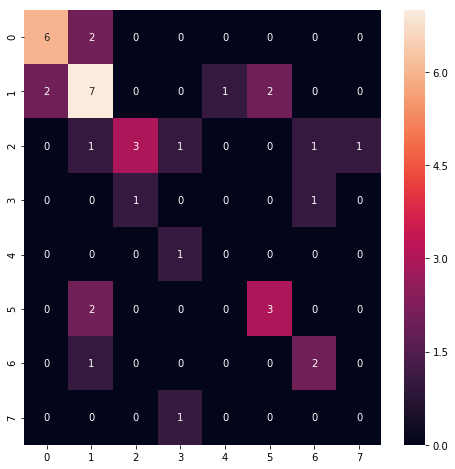

In [317]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True)

Результаты на испытательном наборе ухудшились, получилось сильное переобучение. Oversampling в данном случае не помог.